In [1]:
%load_ext jupyter_probcomp.magics

session_id: jovyan@6a53d13970ee_2020-05-07T18:05:32.650473_5


In [2]:
%matplotlib inline
%vizgpm inline

<IPython.core.display.Javascript object>

In [3]:
!rm -f bdb-files/expression-800x64-1-juliust.bdb

In [4]:
%bayesdb bdb-files/expression-800x64-1-juliust.bdb

u'Loaded: bdb-files/expression-800x64-1-juliust.bdb'

In [5]:
import pandas as pd

In [6]:
full_data = pd.read_csv("/home/jovyan/21521940")

In [7]:
full_data.shape

(1270, 19145)

In [8]:
full_data.ix[:5, :10]

,Unnamed: 0,TSPAN6 (7105),TNMD (64102),DPM1 (8813),SCYL3 (57147),C1orf112 (55732),FGR (2268),CFH (3075),FUCA2 (2519),GCLC (2729)
0,ACH-001097,0.000000,0.0,4.667324,1.761285,3.554589,4.358959,0.641546,2.201634,1.941106
1,ACH-001636,0.000000,0.0,6.198887,2.032101,3.755956,2.601697,0.000000,0.000000,3.415488
2,ACH-001804,4.934988,0.0,6.635464,1.929791,2.503349,0.000000,4.883621,6.772546,3.889474
3,ACH-000534,0.839960,0.0,5.376082,2.687061,4.440288,4.938286,0.536053,3.584963,2.935460
4,ACH-000742,3.722466,0.0,6.029674,2.192194,2.533563,0.150560,5.933809,6.973382,5.192194
5,ACH-000836,4.632268,0.0,6.704180,2.792855,4.079805,0.097611,1.150560,5.729553,4.802193


In [9]:
full_data.rename(columns=lambda col: col.split()[0], inplace=True)

In [10]:
full_data.ix[:5, :10]

,Unnamed:,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC
0,ACH-001097,0.000000,0.0,4.667324,1.761285,3.554589,4.358959,0.641546,2.201634,1.941106
1,ACH-001636,0.000000,0.0,6.198887,2.032101,3.755956,2.601697,0.000000,0.000000,3.415488
2,ACH-001804,4.934988,0.0,6.635464,1.929791,2.503349,0.000000,4.883621,6.772546,3.889474
3,ACH-000534,0.839960,0.0,5.376082,2.687061,4.440288,4.938286,0.536053,3.584963,2.935460
4,ACH-000742,3.722466,0.0,6.029674,2.192194,2.533563,0.150560,5.933809,6.973382,5.192194
5,ACH-000836,4.632268,0.0,6.704180,2.792855,4.079805,0.097611,1.150560,5.729553,4.802193


In [11]:
import numpy as np
np.random.seed(420)

In [12]:
rows = np.random.choice(full_data.shape[0], 800, replace=False)
print(rows)

[ 101 1177  208  574 1053  384   48  436   85  947  630  563  652   43 1041
  657  636  307   45  844  561  214  712  402   35  982  556  355  464  594
 1067 1139  658   61 1199  341  573  452  942 1094 1237  725  644 1141 1025
  706 1201  159  730  878  674   17  697  109  729 1114  234  305  939  474
 1218  637  547  353 1026  283 1071   37  851  244  773  784  175  524 1190
  285 1261 1216  560  149  834  236  352  490  849  845  411  981  835 1233
  486  931  421  418 1057  160 1047  423 1135 1197  677 1208  507  145  461
  111  202 1015  654  193   82   75  879  393  382 1194  264 1210  295  511
 1157  129  780   22  222  693 1198  255 1245 1013   77  225  346  785  944
  781  887  566 1066  737 1055  329  131   36  951  292  185  276  420 1002
  871   16  641  769  617  498  144  714  405  676  648  564  888  902  645
 1010  809  670  620 1243  855  967  337  252 1028 1083 1110  506  933 1246
 1165  530 1155  597  818  576  854  764  351  895  985  401  291  164  812
  948  350 1

In [14]:
control_data = full_data[['POM121', 'POM121C', 'EIF3C', 'EIF3CL']]

In [18]:
test_data = full_data.drop(['POM121', 'POM121C', 'EIF3C', 'EIF3CL'], axis=1)

In [19]:
for col in ['POM121', 'POM121C', 'EIF3C', 'EIF3CL']:
    print(str(col in test_data.columns))

False
False
False
False


In [21]:
control_data.shape

(1270, 4)

In [20]:
test_data.shape

(1270, 19141)

In [22]:
# make random_state equals to trial number to avoid choosing the same random genes
random_data = test_data.sample(n=64-4, replace=False, random_state=1, axis=1)

In [24]:
data = pd.concat([control_data, random_data], axis=1).ix[rows, :]

In [25]:
data.shape

(800, 64)

In [26]:
data.columns

Index([u'POM121', u'POM121C', u'EIF3C', u'EIF3CL', u'CHST5', u'TMEM200A',
       u'FBXO2', u'AACS', u'ZNF157', u'FBLN7', u'RHOBTB2', u'ADK', u'NIP7',
       u'BRDT', u'MLST8', u'PLCB1', u'SPR', u'SIRT1', u'HSD3B7', u'AKAP2',
       u'NUDC', u'UCKL1', u'LRRC10B', u'NBPF14', u'DPH5', u'ICA1', u'MTCL1',
       u'LMNTD1', u'PDE8A', u'HIST1H3H', u'TMEM160', u'FERMT3', u'ARSF',
       u'SOD1', u'COX6C', u'OR5F1', u'RALA', u'STK19', u'AMZ2', u'TAS2R19',
       u'NHSL2', u'ARF4', u'IFNAR2', u'RECQL4', u'IGFBP1', u'IPO13', u'ACACB',
       u'DCAF8L1', u'RPS19', u'CR1L', u'EHHADH', u'SAMD9', u'PRSS22', u'WT1',
       u'IL17A', u'FAM110B', u'GRAMD1C', u'DTX2', u'DENND5B', u'DEFB110',
       u'CEP152', u'RGS16', u'VPS35L', u'PCK1'],
      dtype='object')

In [27]:
data.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False], dtype=bool)

In [28]:
data.head()

,POM121,POM121C,EIF3C,EIF3CL,CHST5,TMEM200A,FBXO2,AACS,ZNF157,FBLN7,RHOBTB2,ADK,NIP7,BRDT,MLST8,PLCB1,SPR,SIRT1,HSD3B7,AKAP2,NUDC,UCKL1,LRRC10B,NBPF14,DPH5,ICA1,MTCL1,LMNTD1,PDE8A,HIST1H3H,TMEM160,FERMT3,ARSF,SOD1,COX6C,OR5F1,RALA,STK19,AMZ2,TAS2R19,NHSL2,ARF4,IFNAR2,RECQL4,IGFBP1,IPO13,ACACB,DCAF8L1,RPS19,CR1L,EHHADH,SAMD9,PRSS22,WT1,IL17A,FAM110B,GRAMD1C,DTX2,DENND5B,DEFB110,CEP152,RGS16,VPS35L,PCK1
101,3.760221,3.753818,7.347311,6.107688,0.042644,0.028569,5.636335,3.496974,0.137504,0.807355,2.495695,5.313246,5.402586,0.000000,4.670161,0.042644,4.351204,3.629939,2.849999,0.214125,6.174726,3.757023,0.000000,2.889474,6.257388,0.000000,1.526069,0.028569,3.593354,2.400538,2.657640,0.124328,0.0,7.366497,9.576050,0.0,5.438293,3.257011,6.242793,0.042644,0.111031,7.968436,2.767655,3.627607,0.000000,3.119356,1.443607,0.042644,12.603209,0.000000,1.531069,3.078951,0.150560,0.014355,0.0,0.000000,2.163499,2.646163,2.070389,0.0,1.752749,0.321928,4.210233,0.042644
1177,6.147307,5.821455,7.536131,5.727648,0.163499,0.333424,4.055716,5.365273,0.189034,0.790772,2.289834,5.163499,5.572890,0.000000,5.486714,3.673556,4.168321,4.071248,2.179511,5.670727,6.051590,5.110614,0.695994,4.393004,4.657068,4.412782,2.319040,0.028569,4.902556,5.914325,3.902074,1.744161,0.0,9.018395,9.000535,0.0,4.603478,5.177121,6.589314,0.310340,0.226509,7.025472,3.539779,4.325530,0.056584,4.786074,2.422233,0.000000,10.945005,0.250962,3.063503,3.434295,5.887525,0.555816,0.0,1.974529,1.918386,4.319040,1.981853,0.0,3.116032,0.250962,4.879706,0.000000
208,3.541019,3.972693,8.810282,6.290940,0.028569,0.000000,3.341986,2.855990,0.014355,0.443607,1.925999,5.330558,4.718088,0.000000,5.357200,2.289834,5.242221,2.480265,3.600508,3.533563,7.072320,3.886550,0.000000,4.572890,5.151778,0.150560,2.587365,0.000000,3.636915,1.367371,4.968552,5.726831,0.0,9.986695,9.627972,0.0,6.693208,3.898208,6.775841,0.042644,0.028569,7.170125,4.331992,4.422233,3.617063,3.469886,0.748461,0.000000,12.418722,0.000000,1.956057,1.895303,0.238787,0.000000,0.0,0.565597,1.049631,4.167519,1.443607,0.0,1.361768,2.341986,4.450221,0.000000
574,5.116448,5.081510,8.239312,7.025915,0.226509,3.606442,3.694880,4.344118,0.042644,0.070389,3.140779,6.318498,5.058316,0.000000,5.211791,2.722466,4.685940,3.367371,3.509696,6.326789,6.867032,5.224581,0.014355,3.044394,4.586765,2.580145,3.594549,0.000000,4.263034,3.570463,5.568336,1.097611,0.0,8.326205,8.633141,0.0,4.648465,4.285402,5.828835,1.182692,0.028569,8.115044,2.987321,5.309613,0.722466,4.309613,2.035624,0.000000,11.812538,0.014355,1.516015,2.220330,0.333424,0.028569,0.0,0.176323,1.021480,3.381283,4.093391,0.0,2.280956,0.028569,4.482848,0.000000
1053,3.917432,3.810443,9.423158,7.737890,0.137504,2.176323,1.310340,4.760221,0.014355,0.765535,3.553361,6.333245,5.711220,0.641546,5.202418,0.475085,5.488001,3.548437,5.415826,5.717813,6.977967,5.157448,0.124328,3.593354,4.113534,6.836808,3.082362,0.000000,4.557655,0.847997,4.300856,0.622930,0.0,8.616843,7.839267,0.0,6.211986,4.057450,5.781884,0.378512,1.104337,7.576598,3.890447,5.358607,0.659925,3.742006,2.014355,0.000000,11.431759,0.505891,3.049631,4.036503,5.755689,0.111031,0.0,0.150560,1.646163,4.719183,1.948601,0.0,2.821710,1.709291,5.776367,0.028569


In [29]:
data.to_csv('Expression-800x64-1.csv', index=False)

In [6]:
%bql DROP TABLE IF EXISTS "data"

""


In [7]:
%bql CREATE TABLE "data" FROM 'Expression-800x64-1.csv'

""


In [8]:
%bql .nullify data ''

Nullified 0 cells


In [9]:
%bql SELECT * FROM "data" LIMIT 5;

,POM121,POM121C,EIF3C,EIF3CL,CHST5,TMEM200A,FBXO2,AACS,ZNF157,FBLN7,RHOBTB2,ADK,NIP7,BRDT,MLST8,PLCB1,SPR,SIRT1,HSD3B7,AKAP2,NUDC,UCKL1,LRRC10B,NBPF14,DPH5,ICA1,MTCL1,LMNTD1,PDE8A,HIST1H3H,TMEM160,FERMT3,ARSF,SOD1,COX6C,OR5F1,RALA,STK19,AMZ2,TAS2R19,NHSL2,ARF4,IFNAR2,RECQL4,IGFBP1,IPO13,ACACB,DCAF8L1,RPS19,CR1L,EHHADH,SAMD9,PRSS22,WT1,IL17A,FAM110B,GRAMD1C,DTX2,DENND5B,DEFB110,CEP152,RGS16,VPS35L,PCK1
0,3.760221,3.753818,7.347311,6.107688,0.042644,0.028569,5.636335,3.496974,0.137504,0.807355,2.495695,5.313246,5.402586,0.000000,4.670161,0.042644,4.351204,3.629939,2.849999,0.214125,6.174726,3.757023,0.000000,2.889474,6.257388,0.000000,1.526069,0.028569,3.593354,2.400538,2.657640,0.124328,0.0,7.366497,9.576050,0.0,5.438293,3.257011,6.242793,0.042644,0.111031,7.968436,2.767655,3.627607,0.000000,3.119356,1.443607,0.042644,12.603209,0.000000,1.531069,3.078951,0.150560,0.014355,0.0,0.000000,2.163499,2.646163,2.070389,0.0,1.752749,0.321928,4.210233,0.042644
1,6.147307,5.821455,7.536131,5.727648,0.163499,0.333424,4.055716,5.365273,0.189034,0.790772,2.289834,5.163499,5.572890,0.000000,5.486714,3.673556,4.168321,4.071248,2.179511,5.670727,6.051590,5.110614,0.695994,4.393004,4.657068,4.412782,2.319040,0.028569,4.902556,5.914325,3.902074,1.744161,0.0,9.018395,9.000535,0.0,4.603478,5.177121,6.589314,0.310340,0.226509,7.025472,3.539779,4.325530,0.056584,4.786074,2.422233,0.000000,10.945005,0.250962,3.063503,3.434295,5.887525,0.555816,0.0,1.974529,1.918386,4.319040,1.981853,0.0,3.116032,0.250962,4.879706,0.000000
2,3.541019,3.972693,8.810282,6.290940,0.028569,0.000000,3.341986,2.855990,0.014355,0.443607,1.925999,5.330558,4.718088,0.000000,5.357200,2.289834,5.242221,2.480265,3.600508,3.533563,7.072320,3.886550,0.000000,4.572890,5.151778,0.150560,2.587365,0.000000,3.636915,1.367371,4.968552,5.726831,0.0,9.986695,9.627972,0.0,6.693208,3.898208,6.775841,0.042644,0.028569,7.170125,4.331992,4.422233,3.617063,3.469886,0.748461,0.000000,12.418722,0.000000,1.956057,1.895303,0.238787,0.000000,0.0,0.565597,1.049631,4.167519,1.443607,0.0,1.361768,2.341986,4.450221,0.000000
3,5.116448,5.081510,8.239312,7.025915,0.226509,3.606442,3.694880,4.344118,0.042644,0.070389,3.140779,6.318498,5.058316,0.000000,5.211791,2.722466,4.685940,3.367371,3.509696,6.326789,6.867032,5.224581,0.014355,3.044394,4.586765,2.580145,3.594549,0.000000,4.263034,3.570463,5.568336,1.097611,0.0,8.326205,8.633141,0.0,4.648465,4.285402,5.828835,1.182692,0.028569,8.115044,2.987321,5.309613,0.722466,4.309613,2.035624,0.000000,11.812538,0.014355,1.516015,2.220330,0.333424,0.028569,0.0,0.176323,1.021480,3.381283,4.093391,0.0,2.280956,0.028569,4.482848,0.000000
4,3.917432,3.810443,9.423158,7.737890,0.137504,2.176323,1.310340,4.760221,0.014355,0.765535,3.553361,6.333245,5.711220,0.641546,5.202418,0.475085,5.488001,3.548437,5.415826,5.717813,6.977967,5.157448,0.124328,3.593354,4.113534,6.836808,3.082362,0.000000,4.557655,0.847997,4.300856,0.622930,0.0,8.616843,7.839267,0.0,6.211986,4.057450,5.781884,0.378512,1.104337,7.576598,3.890447,5.358607,0.659925,3.742006,2.014355,0.000000,11.431759,0.505891,3.049631,4.036503,5.755689,0.111031,0.0,0.150560,1.646163,4.719183,1.948601,0.0,2.821710,1.709291,5.776367,0.028569


In [10]:
%bql SELECT COUNT(*) FROM "data";

,"""COUNT""(*)"
0,800.0


In [11]:
%mml GUESS SCHEMA FOR "data"

,column,stattype,num_distinct,reason
0,POM121,numerical,729.0,There are at least 20 unique numerical values...
1,POM121C,numerical,721.0,There are at least 20 unique numerical values...
2,EIF3C,numerical,794.0,There are at least 20 unique numerical values...
3,EIF3CL,numerical,773.0,There are at least 20 unique numerical values...
4,CHST5,numerical,76.0,There are at least 20 unique numerical values...
5,TMEM200A,numerical,303.0,There are at least 20 unique numerical values...
6,FBXO2,numerical,488.0,There are at least 20 unique numerical values...
7,AACS,numerical,710.0,There are at least 20 unique numerical values...
8,ZNF157,numerical,112.0,There are at least 20 unique numerical values...
9,FBLN7,numerical,316.0,There are at least 20 unique numerical values...


In [12]:
%%mml
CREATE POPULATION FOR "data" WITH SCHEMA (
    -- Use the guesses from the previous cell for all variables.
    GUESS STATTYPES OF (*);
    
    -- Manually override incorrectly guessed statistical types.
    SET STATTYPES OF
        "OR5F1",
        "IL17A",
        "DEFB110"
    TO NUMERICAL;
);

""


### Caveat: replace `SELECT *` by `SELECT col1, col2, col2 ...`  

In [13]:
%bql .interactive_pairplot --population=data SELECT * FROM data

<IPython.core.display.Javascript object>

In [14]:
%mml CREATE GENERATOR FOR "data";

""


In [15]:
%multiprocess on

Multiprocessing turned on from off.


In [16]:
%mml INITIALIZE 32 MODELS IF NOT EXISTS FOR "data";

""


In [17]:
%mml ANALYZE "data" FOR 60 MINUTES

Completed: 33 iterations in 3600.620669 seconds.
Completed: 20 iterations in 3605.016448 seconds.
Completed: 27 iterations in 3605.232616 seconds.
Completed: 21 iterations in 3611.616972 seconds.
Completed: 25 iterations in 3611.923460 seconds.
Completed: 34 iterations in 3613.673667 seconds.
Completed: 24 iterations in 3620.396172 seconds.
Completed: 29 iterations in 3621.844424 seconds.
Completed: 27 iterations in 3621.899464 seconds.
Completed: 23 iterations in 3622.470684 seconds.
Completed: 21 iterations in 3625.719850 seconds.
Completed: 16 iterations in 3636.960894 seconds.
Completed: 23 iterations in 3638.997203 seconds.
Completed: 23 iterations in 3640.105709 seconds.
Completed: 22 iterations in 3640.497109 seconds.
Completed: 36 iterations in 3643.510924 seconds.
Completed: 24 iterations in 3645.335084 seconds.
Completed: 24 iterations in 3645.421980 seconds.
Completed: 30 iterations in 3648.014730 seconds.
Completed: 26 iterations in 3650.539744 seconds.
Completed: 21 iterat

""


In [18]:
%mml ANALYZE "data" FOR 60 MINUTES

Completed: 19 iterations in 3603.057044 seconds.
Completed: 22 iterations in 3610.347830 seconds.
Completed: 21 iterations in 3613.640323 seconds.
Completed: 21 iterations in 3621.989650 seconds.
Completed: 27 iterations in 3626.426537 seconds.
Completed: 21 iterations in 3626.486329 seconds.
Completed: 21 iterations in 3631.813939 seconds.
Completed: 27 iterations in 3632.464266 seconds.
Completed: 33 iterations in 3634.161596 seconds.
Completed: 26 iterations in 3635.275823 seconds.
Completed: 23 iterations in 3635.410995 seconds.
Completed: 27 iterations in 3642.021801 seconds.
Completed: 21 iterations in 3643.139182 seconds.
Completed: 25 iterations in 3644.958209 seconds.
Completed: 28 iterations in 3648.458737 seconds.
Completed: 22 iterations in 3654.456587 seconds.
Completed: 26 iterations in 3655.661643 seconds.
Completed: 20 iterations in 3656.542384 seconds.
Completed: 22 iterations in 3656.916966 seconds.
Completed: 21 iterations in 3658.287043 seconds.
Completed: 23 iterat

""


In [19]:
%mml ANALYZE "data" FOR 60 MINUTES

Completed: 20 iterations in 3600.509298 seconds.
Completed: 21 iterations in 3600.617047 seconds.
Completed: 19 iterations in 3602.787528 seconds.
Completed: 25 iterations in 3605.957761 seconds.
Completed: 23 iterations in 3606.085579 seconds.
Completed: 25 iterations in 3607.068796 seconds.
Completed: 16 iterations in 3609.039632 seconds.
Completed: 26 iterations in 3609.515615 seconds.
Completed: 21 iterations in 3611.406215 seconds.
Completed: 19 iterations in 3611.565483 seconds.
Completed: 21 iterations in 3612.228728 seconds.
Completed: 24 iterations in 3613.441109 seconds.
Completed: 25 iterations in 3614.677802 seconds.
Completed: 19 iterations in 3615.644463 seconds.
Completed: 20 iterations in 3615.794907 seconds.
Completed: 19 iterations in 3616.755618 seconds.
Completed: 20 iterations in 3616.875742 seconds.
Completed: 21 iterations in 3617.685671 seconds.
Completed: 33 iterations in 3618.223560 seconds.
Completed: 19 iterations in 3620.652143 seconds.
Completed: 22 iterat

""


In [20]:
%mml ANALYZE "data" FOR 60 MINUTES

Completed: 18 iterations in 3600.195338 seconds.
Completed: 19 iterations in 3600.696873 seconds.
Completed: 20 iterations in 3602.598397 seconds.
Completed: 20 iterations in 3604.439085 seconds.
Completed: 20 iterations in 3605.588749 seconds.
Completed: 19 iterations in 3605.589666 seconds.
Completed: 16 iterations in 3608.910228 seconds.
Completed: 23 iterations in 3609.443922 seconds.
Completed: 19 iterations in 3612.527169 seconds.
Completed: 21 iterations in 3615.151956 seconds.
Completed: 26 iterations in 3617.448163 seconds.
Completed: 26 iterations in 3619.155120 seconds.
Completed: 18 iterations in 3621.549273 seconds.
Completed: 20 iterations in 3623.453504 seconds.
Completed: 23 iterations in 3625.703777 seconds.
Completed: 32 iterations in 3625.952255 seconds.
Completed: 20 iterations in 3630.731234 seconds.
Completed: 25 iterations in 3632.619906 seconds.
Completed: 21 iterations in 3636.647384 seconds.
Completed: 24 iterations in 3645.231763 seconds.
Completed: 19 iterat

""


In [21]:
%mml ANALYZE "data" FOR 60 MINUTES

Completed: 19 iterations in 3600.607151 seconds.
Completed: 17 iterations in 3602.909197 seconds.
Completed: 17 iterations in 3603.932486 seconds.
Completed: 25 iterations in 3605.386084 seconds.
Completed: 21 iterations in 3606.867275 seconds.
Completed: 15 iterations in 3613.409320 seconds.
Completed: 32 iterations in 3614.664513 seconds.
Completed: 23 iterations in 3618.202641 seconds.
Completed: 15 iterations in 3622.165270 seconds.
Completed: 19 iterations in 3624.935858 seconds.
Completed: 22 iterations in 3626.923157 seconds.
Completed: 20 iterations in 3628.615381 seconds.
Completed: 17 iterations in 3628.874604 seconds.
Completed: 24 iterations in 3628.958933 seconds.
Completed: 21 iterations in 3629.619817 seconds.
Completed: 21 iterations in 3631.748131 seconds.
Completed: 23 iterations in 3633.589481 seconds.
Completed: 22 iterations in 3634.756089 seconds.
Completed: 18 iterations in 3639.166533 seconds.
Completed: 20 iterations in 3639.662702 seconds.
Completed: 23 iterat

""


In [22]:
%mml ANALYZE "data" FOR 60 MINUTES

Completed: 17 iterations in 3608.117360 seconds.
Completed: 20 iterations in 3609.560938 seconds.
Completed: 20 iterations in 3610.277166 seconds.
Completed: 19 iterations in 3610.790202 seconds.
Completed: 21 iterations in 3611.123173 seconds.
Completed: 25 iterations in 3622.765452 seconds.
Completed: 18 iterations in 3623.544725 seconds.
Completed: 18 iterations in 3626.970112 seconds.
Completed: 23 iterations in 3628.552563 seconds.
Completed: 21 iterations in 3628.993451 seconds.
Completed: 23 iterations in 3630.855629 seconds.
Completed: 20 iterations in 3631.578449 seconds.
Completed: 21 iterations in 3632.208847 seconds.
Completed: 16 iterations in 3632.985672 seconds.
Completed: 19 iterations in 3633.328437 seconds.
Completed: 17 iterations in 3635.682399 seconds.
Completed: 16 iterations in 3639.361662 seconds.
Completed: 32 iterations in 3642.708377 seconds.
Completed: 24 iterations in 3646.240853 seconds.
Completed: 25 iterations in 3653.550142 seconds.
Completed: 26 iterat

""


In [23]:
%mml ANALYZE "data" FOR 60 MINUTES

Completed: 19 iterations in 3600.221077 seconds.
Completed: 20 iterations in 3604.167041 seconds.
Completed: 19 iterations in 3608.451428 seconds.
Completed: 15 iterations in 3614.892918 seconds.
Completed: 25 iterations in 3619.242420 seconds.
Completed: 22 iterations in 3620.243125 seconds.
Completed: 21 iterations in 3624.620809 seconds.
Completed: 19 iterations in 3626.345130 seconds.
Completed: 18 iterations in 3627.234723 seconds.
Completed: 15 iterations in 3629.186449 seconds.
Completed: 24 iterations in 3630.511348 seconds.
Completed: 24 iterations in 3631.038420 seconds.
Completed: 22 iterations in 3631.686724 seconds.
Completed: 16 iterations in 3634.098998 seconds.
Completed: 25 iterations in 3636.752063 seconds.
Completed: 20 iterations in 3637.877776 seconds.
Completed: 17 iterations in 3639.010876 seconds.
Completed: 20 iterations in 3640.465102 seconds.
Completed: 24 iterations in 3640.516926 seconds.
Completed: 22 iterations in 3640.785135 seconds.
Completed: 17 iterat

""


In [24]:
%mml ANALYZE "data" FOR 60 MINUTES

Completed: 25 iterations in 3600.752493 seconds.
Completed: 21 iterations in 3601.079579 seconds.
Completed: 15 iterations in 3603.527810 seconds.
Completed: 25 iterations in 3606.750148 seconds.
Completed: 23 iterations in 3610.436909 seconds.
Completed: 18 iterations in 3611.475205 seconds.
Completed: 20 iterations in 3611.995953 seconds.
Completed: 20 iterations in 3613.626697 seconds.
Completed: 20 iterations in 3614.811789 seconds.
Completed: 23 iterations in 3616.770652 seconds.
Completed: 23 iterations in 3624.677996 seconds.
Completed: 15 iterations in 3627.558165 seconds.
Completed: 23 iterations in 3628.680086 seconds.
Completed: 16 iterations in 3629.049974 seconds.
Completed: 17 iterations in 3631.789276 seconds.
Completed: 20 iterations in 3635.405253 seconds.
Completed: 20 iterations in 3636.990960 seconds.
Completed: 21 iterations in 3639.728934 seconds.
Completed: 20 iterations in 3645.333595 seconds.
Completed: 32 iterations in 3645.841875 seconds.
Completed: 19 iterat

""


In [35]:
%mml ANALYZE "data" FOR 60 MINUTES

Completed: 16 iterations in 3601.024348 seconds.
Completed: 21 iterations in 3602.315062 seconds.
Completed: 22 iterations in 3608.646414 seconds.
Completed: 19 iterations in 3617.249978 seconds.
Completed: 23 iterations in 3617.924401 seconds.
Completed: 17 iterations in 3617.967579 seconds.
Completed: 21 iterations in 3619.233109 seconds.
Completed: 16 iterations in 3619.361764 seconds.
Completed: 21 iterations in 3620.563001 seconds.
Completed: 26 iterations in 3625.245000 seconds.
Completed: 19 iterations in 3626.664075 seconds.
Completed: 20 iterations in 3627.184898 seconds.
Completed: 20 iterations in 3628.443172 seconds.
Completed: 23 iterations in 3629.981442 seconds.
Completed: 18 iterations in 3630.564497 seconds.
Completed: 21 iterations in 3640.739980 seconds.
Completed: 33 iterations in 3644.829619 seconds.
Completed: 19 iterations in 3651.861812 seconds.
Completed: 20 iterations in 3660.305927 seconds.
Completed: 24 iterations in 3662.460795 seconds.
Completed: 24 iterat

""


In [36]:
%mml ANALYZE "data" FOR 60 MINUTES

Completed: 16 iterations in 3600.877485 seconds.
Completed: 23 iterations in 3601.067900 seconds.
Completed: 20 iterations in 3602.354486 seconds.
Completed: 21 iterations in 3602.877115 seconds.
Completed: 20 iterations in 3603.461306 seconds.
Completed: 21 iterations in 3612.126550 seconds.
Completed: 21 iterations in 3614.710633 seconds.
Completed: 21 iterations in 3615.401897 seconds.
Completed: 18 iterations in 3615.894405 seconds.
Completed: 23 iterations in 3618.525984 seconds.
Completed: 26 iterations in 3621.685702 seconds.
Completed: 20 iterations in 3623.768383 seconds.
Completed: 16 iterations in 3631.873209 seconds.
Completed: 19 iterations in 3632.799690 seconds.
Completed: 33 iterations in 3632.829321 seconds.
Completed: 23 iterations in 3637.332949 seconds.
Completed: 19 iterations in 3637.807657 seconds.
Completed: 19 iterations in 3639.429232 seconds.
Completed: 20 iterations in 3642.897510 seconds.
Completed: 23 iterations in 3643.731889 seconds.
Completed: 21 iterat

""


In [37]:
%mml ANALYZE "data" FOR 60 MINUTES

Completed: 20 iterations in 3600.129537 seconds.
Completed: 16 iterations in 3600.751922 seconds.
Completed: 24 iterations in 3600.955170 seconds.
Completed: 19 iterations in 3602.454017 seconds.
Completed: 33 iterations in 3602.504205 seconds.
Completed: 16 iterations in 3607.149019 seconds.
Completed: 21 iterations in 3611.817828 seconds.
Completed: 20 iterations in 3612.654278 seconds.
Completed: 18 iterations in 3616.672204 seconds.
Completed: 24 iterations in 3618.593020 seconds.
Completed: 23 iterations in 3618.687382 seconds.
Completed: 20 iterations in 3619.400554 seconds.
Completed: 26 iterations in 3625.203881 seconds.
Completed: 20 iterations in 3628.164957 seconds.
Completed: 21 iterations in 3628.901186 seconds.
Completed: 17 iterations in 3633.595213 seconds.
Completed: 21 iterations in 3636.617106 seconds.
Completed: 21 iterations in 3642.674537 seconds.
Completed: 23 iterations in 3643.233489 seconds.
Completed: 16 iterations in 3644.284213 seconds.
Completed: 21 iterat

""


In [38]:
%mml ANALYZE "data" FOR 60 MINUTES

Completed: 19 iterations in 3602.454652 seconds.
Completed: 22 iterations in 3602.497141 seconds.
Completed: 18 iterations in 3605.571804 seconds.
Completed: 19 iterations in 3607.857626 seconds.
Completed: 21 iterations in 3608.884449 seconds.
Completed: 21 iterations in 3609.422551 seconds.
Completed: 23 iterations in 3611.005753 seconds.
Completed: 21 iterations in 3612.405864 seconds.
Completed: 16 iterations in 3612.763065 seconds.
Completed: 27 iterations in 3615.232582 seconds.
Completed: 21 iterations in 3615.996486 seconds.
Completed: 18 iterations in 3616.463065 seconds.
Completed: 21 iterations in 3622.258287 seconds.
Completed: 22 iterations in 3622.837851 seconds.
Completed: 33 iterations in 3625.074209 seconds.
Completed: 19 iterations in 3628.525478 seconds.
Completed: 16 iterations in 3633.177501 seconds.
Completed: 21 iterations in 3639.944103 seconds.
Completed: 17 iterations in 3641.496997 seconds.
Completed: 23 iterations in 3641.594113 seconds.
Completed: 22 iterat

""


In [39]:
%mml ANALYZE "data" FOR 60 MINUTES

Completed: 20 iterations in 3600.899622 seconds.
Completed: 23 iterations in 3605.373968 seconds.
Completed: 22 iterations in 3610.096216 seconds.
Completed: 22 iterations in 3611.671799 seconds.
Completed: 24 iterations in 3612.426375 seconds.
Completed: 17 iterations in 3614.010143 seconds.
Completed: 25 iterations in 3614.722352 seconds.
Completed: 22 iterations in 3615.035210 seconds.
Completed: 27 iterations in 3615.039115 seconds.
Completed: 23 iterations in 3619.630508 seconds.
Completed: 19 iterations in 3620.309559 seconds.
Completed: 19 iterations in 3625.366034 seconds.
Completed: 16 iterations in 3625.880601 seconds.
Completed: 24 iterations in 3625.961610 seconds.
Completed: 24 iterations in 3627.103377 seconds.
Completed: 16 iterations in 3628.880828 seconds.
Completed: 19 iterations in 3629.937254 seconds.
Completed: 17 iterations in 3630.989734 seconds.
Completed: 17 iterations in 3631.212198 seconds.
Completed: 33 iterations in 3639.820245 seconds.
Completed: 21 iterat

""


In [40]:
%mml ANALYZE "data" FOR 60 MINUTES

Completed: 20 iterations in 3602.278003 seconds.
Completed: 21 iterations in 3603.733763 seconds.
Completed: 24 iterations in 3603.747251 seconds.
Completed: 16 iterations in 3603.982222 seconds.
Completed: 16 iterations in 3605.247949 seconds.
Completed: 16 iterations in 3607.522055 seconds.
Completed: 22 iterations in 3612.921982 seconds.
Completed: 23 iterations in 3613.182847 seconds.
Completed: 20 iterations in 3614.541203 seconds.
Completed: 19 iterations in 3615.613947 seconds.
Completed: 31 iterations in 3617.287624 seconds.
Completed: 19 iterations in 3618.814371 seconds.
Completed: 21 iterations in 3621.572864 seconds.
Completed: 19 iterations in 3621.648525 seconds.
Completed: 20 iterations in 3623.485520 seconds.
Completed: 20 iterations in 3626.717775 seconds.
Completed: 19 iterations in 3626.726176 seconds.
Completed: 21 iterations in 3627.350587 seconds.
Completed: 25 iterations in 3627.871986 seconds.
Completed: 22 iterations in 3635.352100 seconds.
Completed: 19 iterat

""


In [41]:
%mml ANALYZE "data" FOR 60 MINUTES

Completed: 19 iterations in 3601.038118 seconds.
Completed: 16 iterations in 3601.154838 seconds.
Completed: 16 iterations in 3602.683753 seconds.
Completed: 21 iterations in 3603.449147 seconds.
Completed: 20 iterations in 3604.346694 seconds.
Completed: 16 iterations in 3604.587550 seconds.
Completed: 25 iterations in 3605.244477 seconds.
Completed: 22 iterations in 3607.150106 seconds.
Completed: 18 iterations in 3614.150069 seconds.
Completed: 22 iterations in 3614.565102 seconds.
Completed: 21 iterations in 3616.022419 seconds.
Completed: 15 iterations in 3624.301333 seconds.
Completed: 21 iterations in 3628.344839 seconds.
Completed: 24 iterations in 3628.377446 seconds.
Completed: 23 iterations in 3630.972809 seconds.
Completed: 18 iterations in 3635.120488 seconds.
Completed: 30 iterations in 3636.539241 seconds.
Completed: 19 iterations in 3639.714702 seconds.
Completed: 20 iterations in 3640.092153 seconds.
Completed: 18 iterations in 3641.815835 seconds.
Completed: 16 iterat

""


In [42]:
%mml ANALYZE "data" FOR 60 MINUTES

Completed: 16 iterations in 3600.186348 seconds.
Completed: 19 iterations in 3602.013395 seconds.
Completed: 19 iterations in 3603.311900 seconds.
Completed: 16 iterations in 3603.591448 seconds.
Completed: 19 iterations in 3605.908620 seconds.
Completed: 22 iterations in 3606.098658 seconds.
Completed: 15 iterations in 3607.358004 seconds.
Completed: 22 iterations in 3608.572693 seconds.
Completed: 22 iterations in 3608.958759 seconds.
Completed: 16 iterations in 3609.035711 seconds.
Completed: 20 iterations in 3609.107391 seconds.
Completed: 21 iterations in 3613.450851 seconds.
Completed: 20 iterations in 3619.816021 seconds.
Completed: 18 iterations in 3621.142170 seconds.
Completed: 21 iterations in 3621.320623 seconds.
Completed: 18 iterations in 3622.591417 seconds.
Completed: 25 iterations in 3622.717291 seconds.
Completed: 20 iterations in 3631.677746 seconds.
Completed: 23 iterations in 3632.830888 seconds.
Completed: 17 iterations in 3633.815415 seconds.
Completed: 21 iterat

""


In [46]:
%mml ANALYZE "data" FOR 60 MINUTES

Completed: 22 iterations in 3602.093300 seconds.
Completed: 17 iterations in 3605.559692 seconds.
Completed: 20 iterations in 3610.970800 seconds.
Completed: 24 iterations in 3616.328185 seconds.
Completed: 15 iterations in 3618.086078 seconds.
Completed: 19 iterations in 3618.919260 seconds.
Completed: 23 iterations in 3620.604243 seconds.
Completed: 18 iterations in 3622.633203 seconds.
Completed: 26 iterations in 3623.865977 seconds.
Completed: 19 iterations in 3624.610969 seconds.
Completed: 21 iterations in 3628.144158 seconds.
Completed: 21 iterations in 3630.787019 seconds.
Completed: 20 iterations in 3635.260533 seconds.
Completed: 21 iterations in 3641.769765 seconds.
Completed: 23 iterations in 3641.950089 seconds.
Completed: 18 iterations in 3644.622364 seconds.
Completed: 18 iterations in 3645.399707 seconds.
Completed: 21 iterations in 3646.313097 seconds.
Completed: 20 iterations in 3650.530569 seconds.
Completed: 30 iterations in 3651.203319 seconds.
Completed: 15 iterat

""


In [47]:
%mml ANALYZE "data" FOR 60 MINUTES

Completed: 22 iterations in 3601.237957 seconds.
Completed: 22 iterations in 3604.252292 seconds.
Completed: 16 iterations in 3605.837789 seconds.
Completed: 17 iterations in 3610.243665 seconds.
Completed: 22 iterations in 3612.105654 seconds.
Completed: 21 iterations in 3613.677744 seconds.
Completed: 20 iterations in 3616.910607 seconds.
Completed: 18 iterations in 3617.058380 seconds.
Completed: 20 iterations in 3620.220359 seconds.
Completed: 22 iterations in 3626.742476 seconds.
Completed: 21 iterations in 3631.374908 seconds.
Completed: 18 iterations in 3633.019087 seconds.
Completed: 31 iterations in 3633.584207 seconds.
Completed: 21 iterations in 3635.026174 seconds.
Completed: 20 iterations in 3636.380792 seconds.
Completed: 22 iterations in 3639.072646 seconds.
Completed: 21 iterations in 3639.891975 seconds.
Completed: 25 iterations in 3641.359836 seconds.
Completed: 19 iterations in 3641.415959 seconds.
Completed: 18 iterations in 3645.169524 seconds.
Completed: 23 iterat

""


In [48]:
%mml ANALYZE "data" FOR 60 MINUTES

Completed: 22 iterations in 3600.299696 seconds.
Completed: 25 iterations in 3600.578807 seconds.
Completed: 23 iterations in 3603.771159 seconds.
Completed: 21 iterations in 3603.939031 seconds.
Completed: 23 iterations in 3608.206061 seconds.
Completed: 20 iterations in 3608.498389 seconds.
Completed: 20 iterations in 3612.258041 seconds.
Completed: 21 iterations in 3613.284325 seconds.
Completed: 21 iterations in 3619.629749 seconds.
Completed: 18 iterations in 3622.349906 seconds.
Completed: 24 iterations in 3623.728886 seconds.
Completed: 21 iterations in 3626.834257 seconds.
Completed: 21 iterations in 3629.025429 seconds.
Completed: 18 iterations in 3630.788412 seconds.
Completed: 24 iterations in 3631.302791 seconds.
Completed: 21 iterations in 3632.663002 seconds.
Completed: 20 iterations in 3634.814671 seconds.
Completed: 19 iterations in 3637.482645 seconds.
Completed: 31 iterations in 3641.439954 seconds.
Completed: 16 iterations in 3642.204216 seconds.
Completed: 18 iterat

""


In [49]:
%mml ANALYZE "data" FOR 60 MINUTES

Completed: 16 iterations in 3604.970614 seconds.
Completed: 21 iterations in 3608.440371 seconds.
Completed: 23 iterations in 3609.660029 seconds.
Completed: 22 iterations in 3612.943264 seconds.
Completed: 22 iterations in 3617.820025 seconds.
Completed: 21 iterations in 3621.995948 seconds.
Completed: 25 iterations in 3624.401480 seconds.
Completed: 21 iterations in 3628.112786 seconds.
Completed: 23 iterations in 3629.766022 seconds.
Completed: 20 iterations in 3630.119094 seconds.
Completed: 19 iterations in 3631.599681 seconds.
Completed: 20 iterations in 3634.123759 seconds.
Completed: 20 iterations in 3634.578483 seconds.
Completed: 19 iterations in 3638.917637 seconds.
Completed: 31 iterations in 3644.322996 seconds.
Completed: 19 iterations in 3646.685408 seconds.
Completed: 17 iterations in 3649.034738 seconds.
Completed: 20 iterations in 3649.090308 seconds.
Completed: 19 iterations in 3653.363335 seconds.
Completed: 18 iterations in 3654.954769 seconds.
Completed: 22 iterat

""


In [55]:
%mml ANALYZE "data" FOR 60 MINUTES

Completed: 20 iterations in 3602.770033 seconds.
Completed: 21 iterations in 3604.211717 seconds.
Completed: 23 iterations in 3604.928022 seconds.
Completed: 19 iterations in 3605.837258 seconds.
Completed: 22 iterations in 3610.380502 seconds.
Completed: 22 iterations in 3612.375460 seconds.
Completed: 22 iterations in 3613.576524 seconds.
Completed: 21 iterations in 3614.420021 seconds.
Completed: 19 iterations in 3615.605643 seconds.
Completed: 21 iterations in 3620.210510 seconds.
Completed: 22 iterations in 3623.072076 seconds.
Completed: 31 iterations in 3623.930062 seconds.
Completed: 19 iterations in 3626.067019 seconds.
Completed: 21 iterations in 3626.564339 seconds.
Completed: 19 iterations in 3629.760077 seconds.
Completed: 17 iterations in 3629.922555 seconds.
Completed: 16 iterations in 3632.382547 seconds.
Completed: 21 iterations in 3634.504841 seconds.
Completed: 17 iterations in 3634.649602 seconds.
Completed: 17 iterations in 3644.904941 seconds.
Completed: 21 iterat

""


In [56]:
%mml ANALYZE "data" FOR 60 MINUTES

Completed: 22 iterations in 3603.183926 seconds.
Completed: 23 iterations in 3603.773008 seconds.
Completed: 19 iterations in 3604.164310 seconds.
Completed: 20 iterations in 3606.176667 seconds.
Completed: 20 iterations in 3607.092431 seconds.
Completed: 22 iterations in 3609.597715 seconds.
Completed: 15 iterations in 3609.779675 seconds.
Completed: 24 iterations in 3614.133384 seconds.
Completed: 15 iterations in 3614.257549 seconds.
Completed: 21 iterations in 3617.177374 seconds.
Completed: 18 iterations in 3619.389087 seconds.
Completed: 20 iterations in 3622.737772 seconds.
Completed: 24 iterations in 3628.874787 seconds.
Completed: 23 iterations in 3629.128603 seconds.
Completed: 22 iterations in 3633.949202 seconds.
Completed: 20 iterations in 3635.039687 seconds.
Completed: 20 iterations in 3636.590317 seconds.
Completed: 31 iterations in 3642.849610 seconds.
Completed: 20 iterations in 3642.976537 seconds.
Completed: 16 iterations in 3646.509295 seconds.
Completed: 22 iterat

""


In [57]:
%mml ANALYZE "data" FOR 60 MINUTES

Completed: 19 iterations in 3600.227219 seconds.
Completed: 23 iterations in 3601.036913 seconds.
Completed: 20 iterations in 3603.961716 seconds.
Completed: 24 iterations in 3607.893879 seconds.
Completed: 21 iterations in 3608.632473 seconds.
Completed: 18 iterations in 3611.238856 seconds.
Completed: 19 iterations in 3613.826761 seconds.
Completed: 22 iterations in 3615.100388 seconds.
Completed: 16 iterations in 3615.695668 seconds.
Completed: 18 iterations in 3618.930532 seconds.
Completed: 22 iterations in 3618.960033 seconds.
Completed: 22 iterations in 3621.034077 seconds.
Completed: 20 iterations in 3621.417936 seconds.
Completed: 21 iterations in 3628.351406 seconds.
Completed: 16 iterations in 3628.835246 seconds.
Completed: 24 iterations in 3630.382591 seconds.
Completed: 20 iterations in 3631.422398 seconds.
Completed: 20 iterations in 3633.503134 seconds.
Completed: 20 iterations in 3634.010297 seconds.
Completed: 30 iterations in 3638.279580 seconds.
Completed: 16 iterat

""


In [58]:
%mml ANALYZE "data" FOR 60 MINUTES

Completed: 23 iterations in 3602.437168 seconds.
Completed: 20 iterations in 3603.259707 seconds.
Completed: 21 iterations in 3604.570770 seconds.
Completed: 25 iterations in 3604.674122 seconds.
Completed: 22 iterations in 3605.272639 seconds.
Completed: 20 iterations in 3608.446000 seconds.
Completed: 18 iterations in 3608.821743 seconds.
Completed: 15 iterations in 3612.131149 seconds.
Completed: 22 iterations in 3613.161240 seconds.
Completed: 21 iterations in 3617.699632 seconds.
Completed: 30 iterations in 3625.407819 seconds.
Completed: 19 iterations in 3631.665709 seconds.
Completed: 20 iterations in 3632.294903 seconds.
Completed: 18 iterations in 3636.048343 seconds.
Completed: 19 iterations in 3640.693001 seconds.
Completed: 20 iterations in 3644.740168 seconds.
Completed: 22 iterations in 3650.251344 seconds.
Completed: 22 iterations in 3656.553467 seconds.
Completed: 21 iterations in 3658.821545 seconds.
Completed: 23 iterations in 3660.000261 seconds.
Completed: 16 iterat

""


In [59]:
%mml ANALYZE "data" FOR 60 MINUTES

Completed: 22 iterations in 3600.337006 seconds.
Completed: 17 iterations in 3600.553081 seconds.
Completed: 23 iterations in 3600.710610 seconds.
Completed: 21 iterations in 3601.128333 seconds.
Completed: 21 iterations in 3602.585913 seconds.
Completed: 16 iterations in 3605.738083 seconds.
Completed: 18 iterations in 3607.488375 seconds.
Completed: 21 iterations in 3609.252187 seconds.
Completed: 19 iterations in 3611.290933 seconds.
Completed: 23 iterations in 3612.757080 seconds.
Completed: 21 iterations in 3616.455508 seconds.
Completed: 20 iterations in 3618.135854 seconds.
Completed: 23 iterations in 3624.012462 seconds.
Completed: 25 iterations in 3626.520402 seconds.
Completed: 17 iterations in 3634.720504 seconds.
Completed: 20 iterations in 3638.029582 seconds.
Completed: 16 iterations in 3638.379395 seconds.
Completed: 18 iterations in 3642.924255 seconds.
Completed: 15 iterations in 3645.464346 seconds.
Completed: 19 iterations in 3647.790565 seconds.
Completed: 19 iterat

""


In [60]:
%mml ANALYZE "data" FOR 60 MINUTES

Completed: 17 iterations in 3600.719128 seconds.
Completed: 21 iterations in 3601.217961 seconds.
Completed: 21 iterations in 3602.480101 seconds.
Completed: 25 iterations in 3602.717641 seconds.
Completed: 24 iterations in 3603.615704 seconds.
Completed: 18 iterations in 3605.648266 seconds.
Completed: 22 iterations in 3610.089250 seconds.
Completed: 24 iterations in 3610.664873 seconds.
Completed: 18 iterations in 3613.759516 seconds.
Completed: 20 iterations in 3614.700281 seconds.
Completed: 16 iterations in 3615.588236 seconds.
Completed: 22 iterations in 3616.202295 seconds.
Completed: 22 iterations in 3618.376426 seconds.
Completed: 19 iterations in 3621.004788 seconds.
Completed: 31 iterations in 3629.100282 seconds.
Completed: 21 iterations in 3631.560711 seconds.
Completed: 20 iterations in 3638.976217 seconds.
Completed: 16 iterations in 3639.718232 seconds.
Completed: 16 iterations in 3640.058950 seconds.
Completed: 23 iterations in 3640.919469 seconds.
Completed: 21 iterat

""


In [61]:
%mml ANALYZE "data" FOR 60 MINUTES

Completed: 20 iterations in 3600.442280 seconds.
Completed: 23 iterations in 3602.186416 seconds.
Completed: 19 iterations in 3603.771746 seconds.
Completed: 19 iterations in 3604.225807 seconds.
Completed: 21 iterations in 3605.108318 seconds.
Completed: 20 iterations in 3606.282662 seconds.
Completed: 23 iterations in 3606.334515 seconds.
Completed: 20 iterations in 3606.946261 seconds.
Completed: 20 iterations in 3607.214095 seconds.
Completed: 22 iterations in 3609.275762 seconds.
Completed: 20 iterations in 3615.490518 seconds.
Completed: 31 iterations in 3624.148419 seconds.
Completed: 23 iterations in 3624.257420 seconds.
Completed: 16 iterations in 3624.287251 seconds.
Completed: 17 iterations in 3630.153364 seconds.
Completed: 23 iterations in 3632.724738 seconds.
Completed: 25 iterations in 3637.716658 seconds.
Completed: 17 iterations in 3637.927836 seconds.
Completed: 21 iterations in 3642.163192 seconds.
Completed: 22 iterations in 3649.206041 seconds.
Completed: 22 iterat

""


In [62]:
%mml ANALYZE "data" FOR 60 MINUTES

Completed: 24 iterations in 3601.861859 seconds.
Completed: 21 iterations in 3602.080863 seconds.
Completed: 20 iterations in 3606.664763 seconds.
Completed: 19 iterations in 3606.908730 seconds.
Completed: 20 iterations in 3606.977306 seconds.
Completed: 18 iterations in 3607.507241 seconds.
Completed: 23 iterations in 3608.530941 seconds.
Completed: 17 iterations in 3608.889632 seconds.
Completed: 22 iterations in 3614.170556 seconds.
Completed: 19 iterations in 3616.302684 seconds.
Completed: 23 iterations in 3617.284120 seconds.
Completed: 23 iterations in 3620.495142 seconds.
Completed: 20 iterations in 3621.950613 seconds.
Completed: 19 iterations in 3624.449830 seconds.
Completed: 20 iterations in 3631.878029 seconds.
Completed: 16 iterations in 3631.973119 seconds.
Completed: 23 iterations in 3635.991356 seconds.
Completed: 25 iterations in 3640.182386 seconds.
Completed: 21 iterations in 3642.524225 seconds.
Completed: 31 iterations in 3642.597646 seconds.
Completed: 22 iterat

""


In [63]:
%mml ANALYZE "data" FOR 60 MINUTES

Completed: 21 iterations in 3603.492892 seconds.
Completed: 19 iterations in 3603.628687 seconds.
Completed: 22 iterations in 3608.328004 seconds.
Completed: 20 iterations in 3608.754134 seconds.
Completed: 19 iterations in 3609.198463 seconds.
Completed: 16 iterations in 3610.046037 seconds.
Completed: 21 iterations in 3613.470478 seconds.
Completed: 22 iterations in 3613.477745 seconds.
Completed: 22 iterations in 3615.894789 seconds.
Completed: 22 iterations in 3617.661018 seconds.
Completed: 20 iterations in 3619.535878 seconds.
Completed: 22 iterations in 3620.774953 seconds.
Completed: 26 iterations in 3623.542619 seconds.
Completed: 18 iterations in 3628.002607 seconds.
Completed: 20 iterations in 3629.231955 seconds.
Completed: 18 iterations in 3630.680855 seconds.
Completed: 23 iterations in 3642.238573 seconds.
Completed: 31 iterations in 3645.204319 seconds.
Completed: 18 iterations in 3653.176526 seconds.
Completed: 22 iterations in 3653.291712 seconds.
Completed: 19 iterat

""


In [64]:
%mml ANALYZE "data" FOR 60 MINUTES

Completed: 20 iterations in 3600.335998 seconds.
Completed: 19 iterations in 3605.864046 seconds.
Completed: 21 iterations in 3608.531203 seconds.
Completed: 20 iterations in 3613.439859 seconds.
Completed: 20 iterations in 3613.721990 seconds.
Completed: 16 iterations in 3613.901967 seconds.
Completed: 18 iterations in 3615.253031 seconds.
Completed: 17 iterations in 3619.126099 seconds.
Completed: 23 iterations in 3619.324217 seconds.
Completed: 31 iterations in 3625.117953 seconds.
Completed: 19 iterations in 3625.288692 seconds.
Completed: 25 iterations in 3627.798970 seconds.
Completed: 21 iterations in 3628.757631 seconds.
Completed: 16 iterations in 3629.414612 seconds.
Completed: 22 iterations in 3632.426977 seconds.
Completed: 23 iterations in 3639.722018 seconds.
Completed: 20 iterations in 3640.080029 seconds.
Completed: 20 iterations in 3644.564241 seconds.
Completed: 16 iterations in 3645.926711 seconds.
Completed: 22 iterations in 3646.098978 seconds.
Completed: 23 iterat

""


In [65]:
%mml ANALYZE "data" FOR 60 MINUTES

Completed: 31 iterations in 3603.907679 seconds.
Completed: 23 iterations in 3604.829884 seconds.
Completed: 22 iterations in 3605.663857 seconds.
Completed: 20 iterations in 3606.340150 seconds.
Completed: 19 iterations in 3606.699934 seconds.
Completed: 22 iterations in 3612.974940 seconds.
Completed: 19 iterations in 3614.146763 seconds.
Completed: 24 iterations in 3616.345834 seconds.
Completed: 23 iterations in 3618.211301 seconds.
Completed: 19 iterations in 3619.612345 seconds.
Completed: 23 iterations in 3620.023600 seconds.
Completed: 19 iterations in 3623.996953 seconds.
Completed: 16 iterations in 3624.980971 seconds.
Completed: 25 iterations in 3629.576976 seconds.
Completed: 22 iterations in 3631.888241 seconds.
Completed: 21 iterations in 3631.898459 seconds.
Completed: 19 iterations in 3632.911829 seconds.
Completed: 19 iterations in 3635.451190 seconds.
Completed: 21 iterations in 3639.970115 seconds.
Completed: 17 iterations in 3644.177218 seconds.
Completed: 20 iterat

""


In [66]:
%mml ANALYZE "data" FOR 60 MINUTES

Completed: 21 iterations in 3606.414566 seconds.
Completed: 22 iterations in 3606.675608 seconds.
Completed: 22 iterations in 3606.741729 seconds.
Completed: 20 iterations in 3607.384061 seconds.
Completed: 22 iterations in 3615.260622 seconds.
Completed: 22 iterations in 3616.702797 seconds.
Completed: 19 iterations in 3616.891444 seconds.
Completed: 17 iterations in 3620.098221 seconds.
Completed: 31 iterations in 3621.717068 seconds.
Completed: 20 iterations in 3621.955174 seconds.
Completed: 19 iterations in 3627.645414 seconds.
Completed: 26 iterations in 3629.494044 seconds.
Completed: 22 iterations in 3634.980728 seconds.
Completed: 20 iterations in 3635.892370 seconds.
Completed: 20 iterations in 3638.175801 seconds.
Completed: 20 iterations in 3642.165399 seconds.
Completed: 19 iterations in 3642.546437 seconds.
Completed: 23 iterations in 3645.609181 seconds.
Completed: 22 iterations in 3648.244792 seconds.
Completed: 23 iterations in 3649.877811 seconds.
Completed: 21 iterat

""


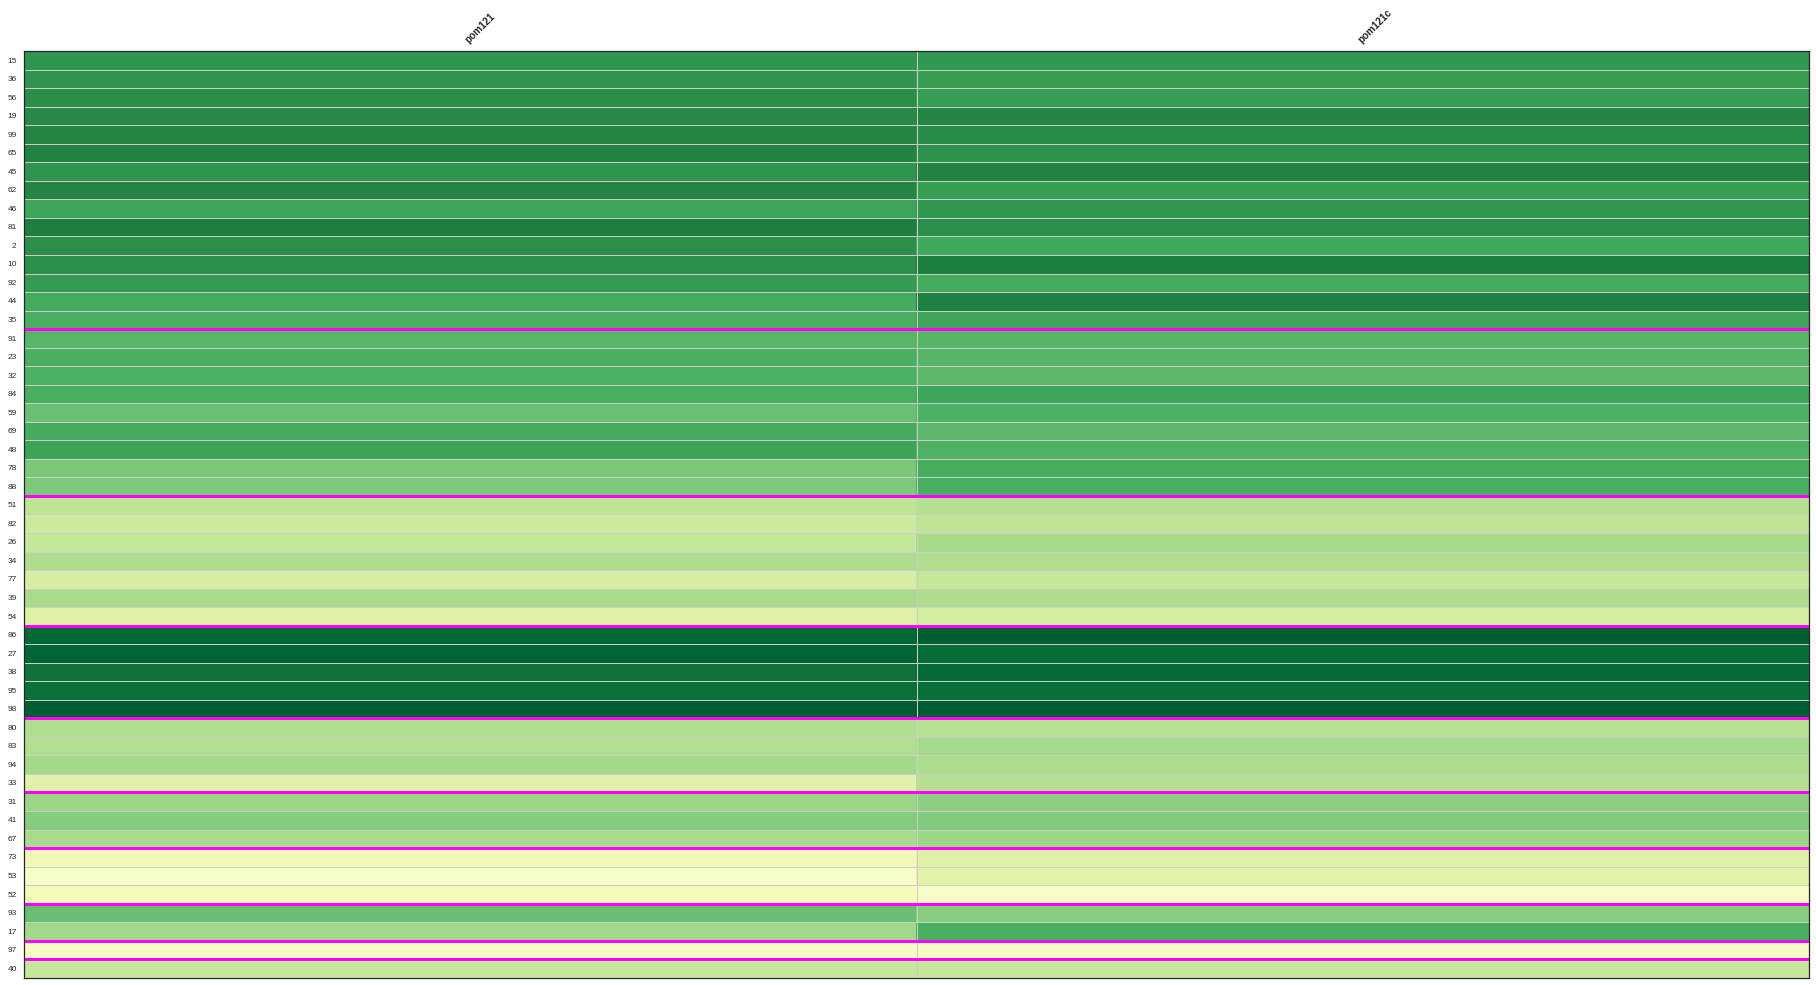

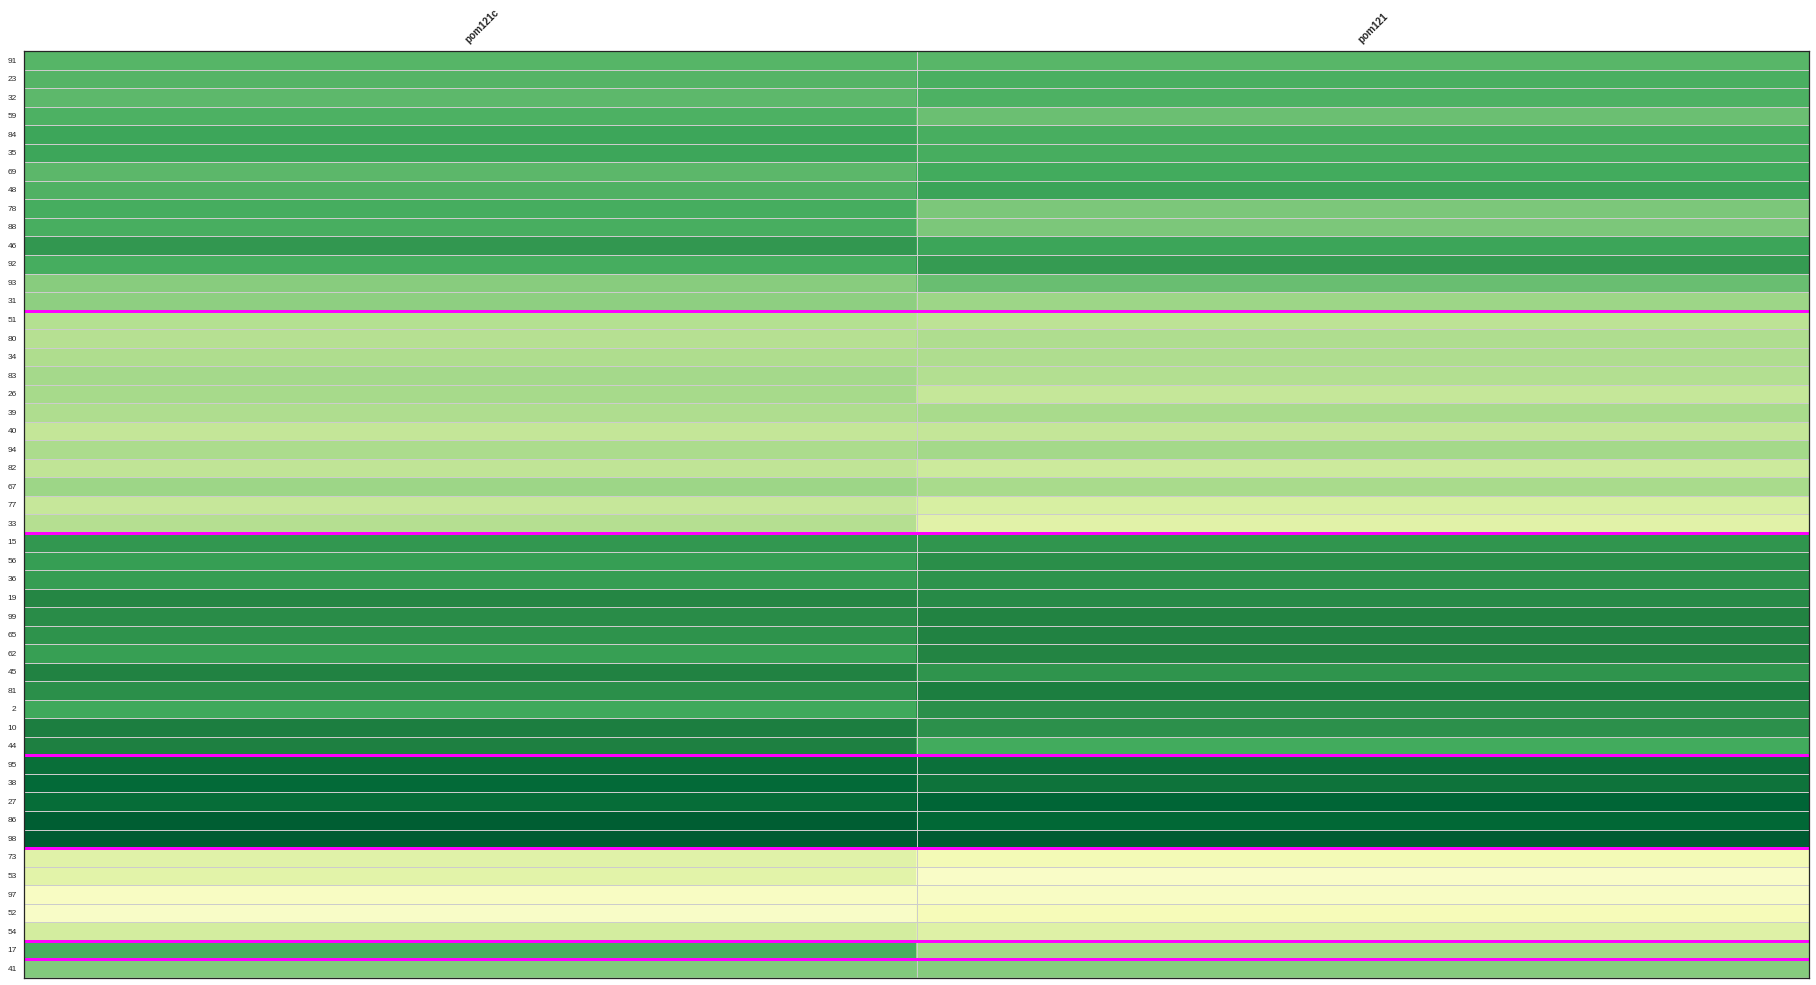

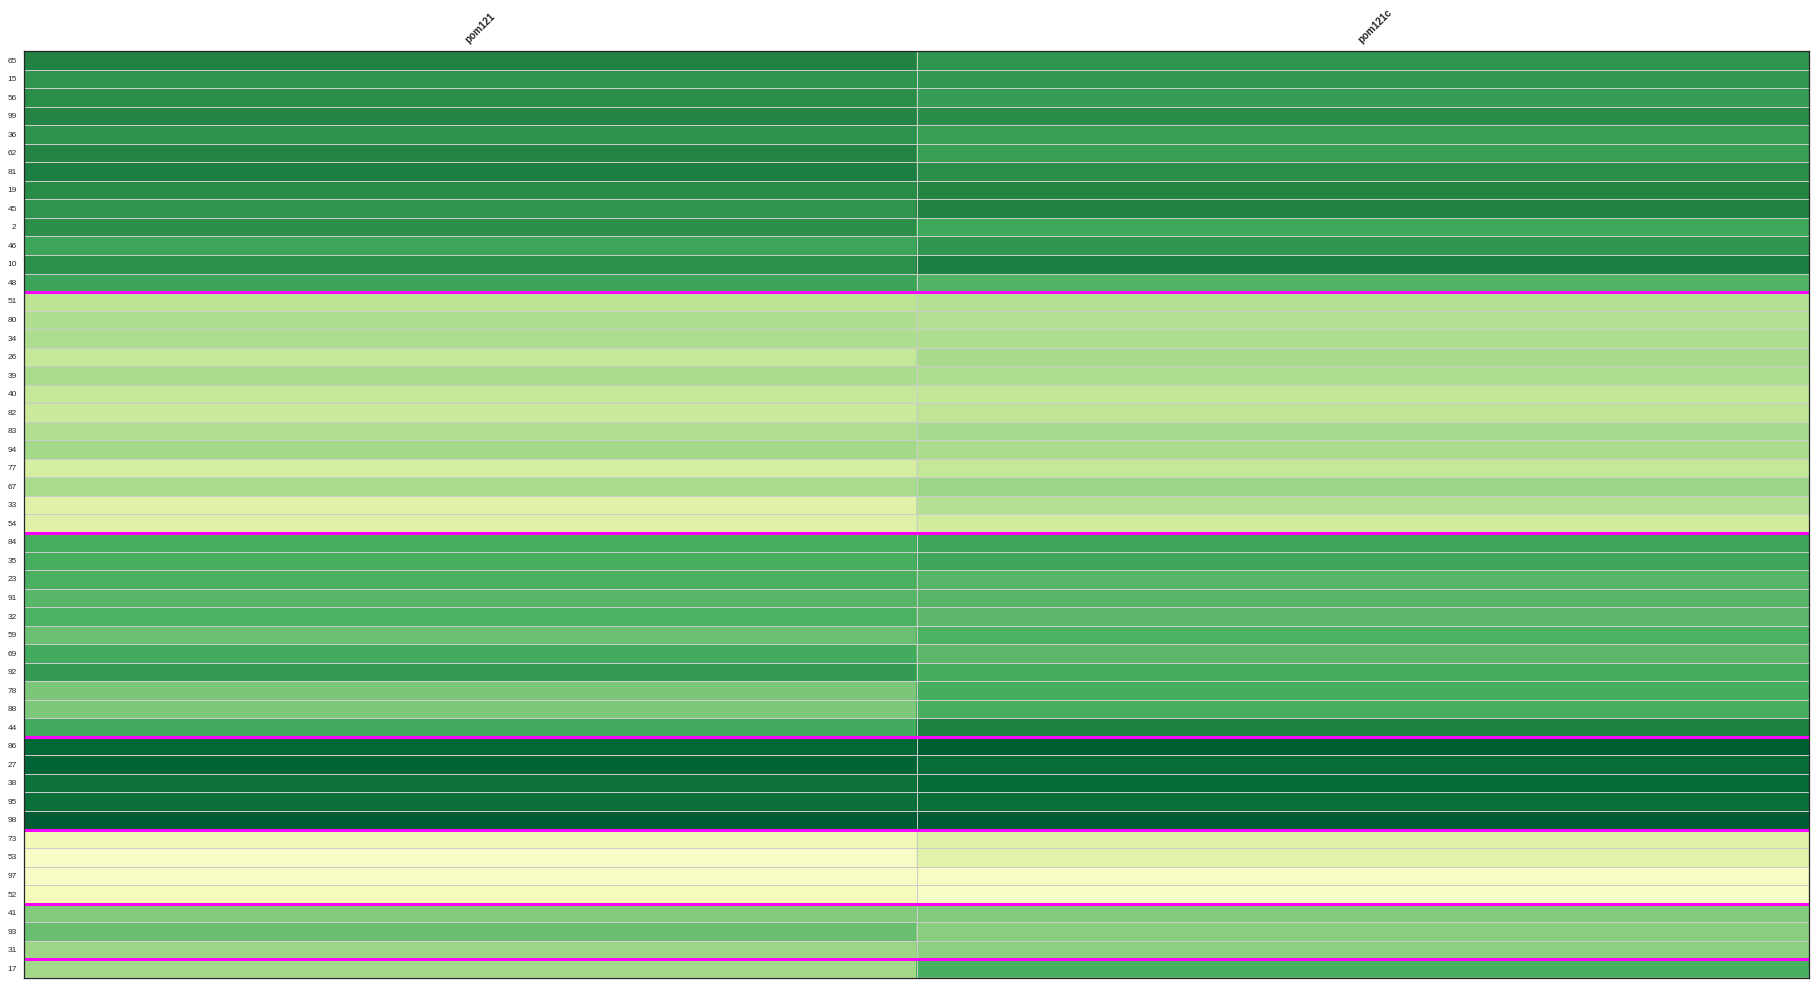

In [19]:
%mml .render_crosscat \
    --subsample=50  --xticklabelsize=small --yticklabelsize=x-small data 0
%mml .render_crosscat \
    --subsample=50  --xticklabelsize=small --yticklabelsize=x-small data 1
%mml .render_crosscat \
    --subsample=50  --xticklabelsize=small --yticklabelsize=x-small data 2

In [20]:
%%bql
DROP TABLE IF EXISTS "correlations";
CREATE TABLE "correlations" AS
ESTIMATE
    CORRELATION AS "correlation",
    CORRELATION PVALUE AS "pvalue"
FROM PAIRWISE VARIABLES OF "data"

""


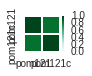

In [21]:
%bql .heatmap SELECT name0, name1, "correlation" FROM "correlations" 

In [22]:
%%bql
DROP TABLE IF EXISTS dependencies;
CREATE TABLE dependencies AS
ESTIMATE
    DEPENDENCE PROBABILITY AS "depprob"
FROM PAIRWISE VARIABLES OF data;

""


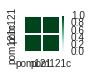

In [23]:
%bql .heatmap SELECT name0, name1, depprob FROM dependencies;

In [24]:
%bql SELECT DISTINCT(name0) FROM dependencies;

,name0
0,pom121
1,pom121c


In [25]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
import simplejson

data = %bql SELECT * FROM "data"
genes = [c for c in data.columns if c !='part']

def get_limits(vals):
    return np.min(vals), np.max(vals)

def plot_simulated_data(x, y, xlim=None, ylim=None):
    """Plot simulated pairwise data against observed data."""
    df_select = %bql SELECT  "{x}", "{y}"  FROM "data"
    N = len(df_select)
    df_sim = %bql SIMULATE  "{x}", "{y}"  FROM "data" LIMIT {N}
    fig, ax = plt.subplots()
    alpha = 0.9
    size=2
    ax.scatter(df_sim[x].values, df_sim[y].values, color='darkblue', alpha=alpha, s=size)
    ax.scatter(df_select[x].values, df_select[y].values, color='red', alpha=alpha, s=size)
    ax.scatter([], [], color='darkblue', label='SIMULATEd data')
    ax.scatter([], [], color='red', label= 'SELECTed data')
    ax.set_xlim(get_limits(df_select[x].values))
    ax.set_ylim(get_limits(df_select[y].values))
    ax.legend()
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title('SELECT vs SIMULATE')
    ax.grid(True)
    fig.set_size_inches(8, 6)
    plt.tight_layout()
    return fig, ax

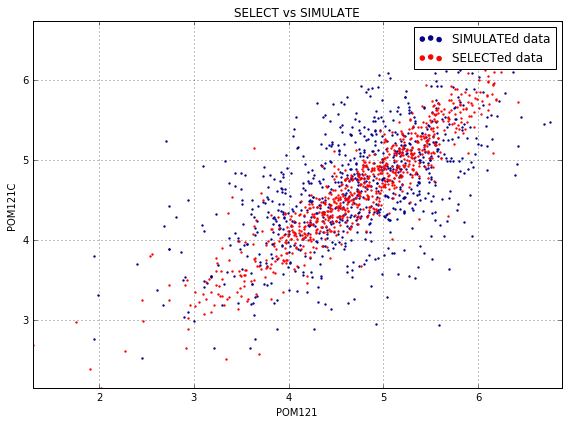

In [28]:
fig, ax = plot_simulated_data("POM121", "POM121C")

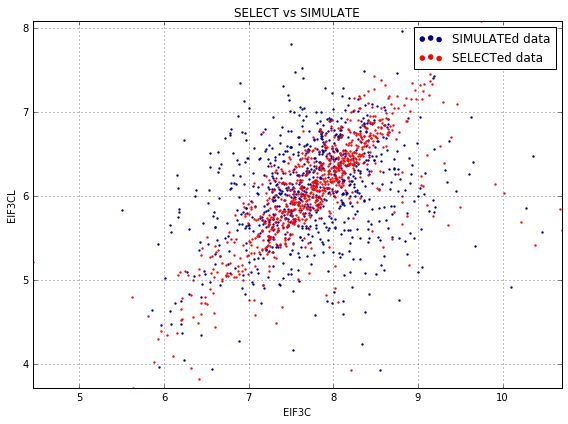

In [29]:
fig, ax = plot_simulated_data("EIF3C", "EIF3CL")

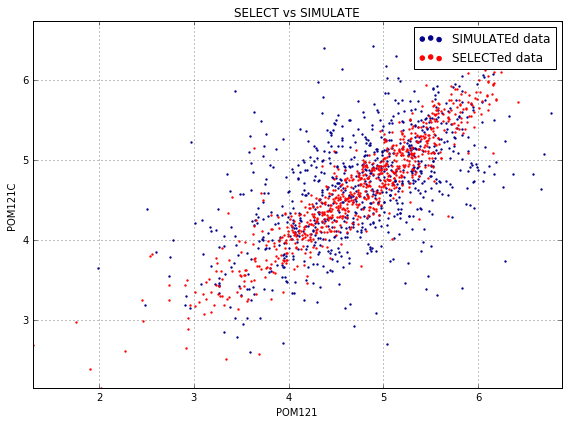

In [43]:
fig, ax = plot_simulated_data("POM121", "POM121C")

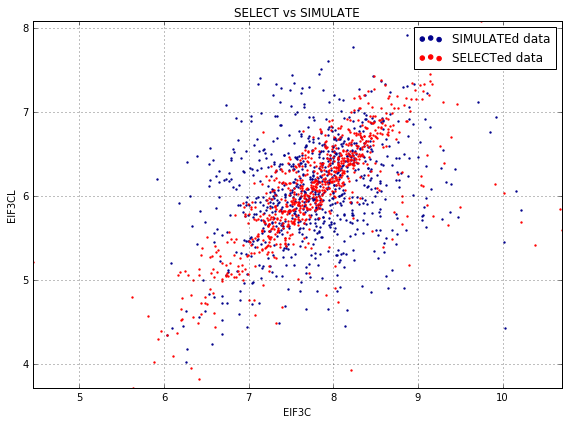

In [44]:
fig, ax = plot_simulated_data("EIF3C", "EIF3CL")

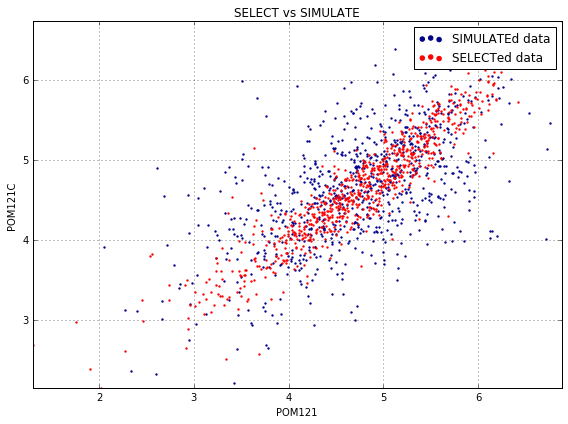

In [50]:
fig, ax = plot_simulated_data("POM121", "POM121C")

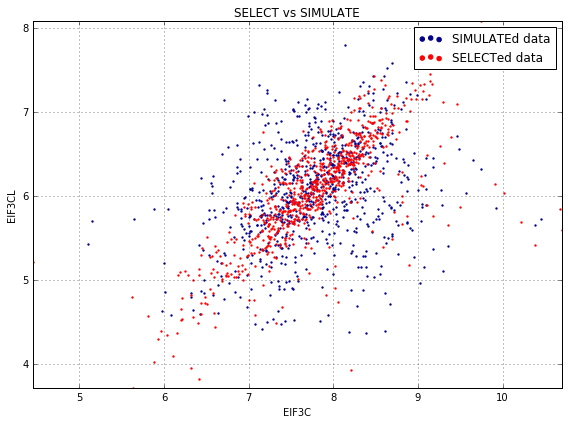

In [51]:
fig, ax = plot_simulated_data("EIF3C", "EIF3CL")

In [30]:
np.random.seed(42)

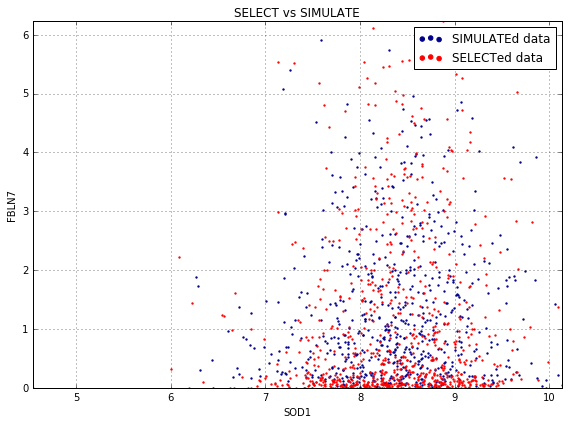

In [52]:
g1, g2 = np.random.choice(genes, 2, replace=False)
fig, ax = plot_simulated_data(g1, g2)

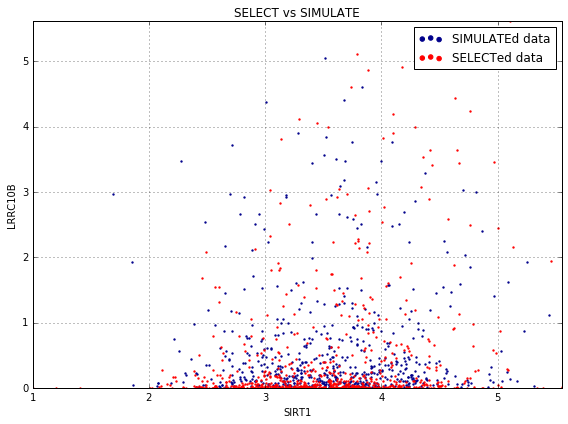

In [53]:
g1, g2 = np.random.choice(genes, 2, replace=False)
fig, ax = plot_simulated_data(g1, g2)

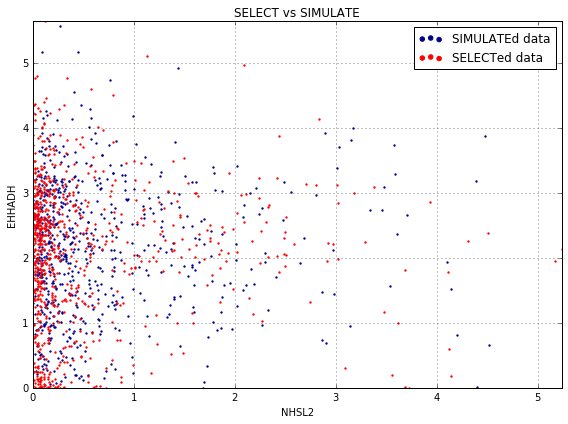

In [54]:
g1, g2 = np.random.choice(genes, 2, replace=False)
fig, ax = plot_simulated_data(g1, g2)

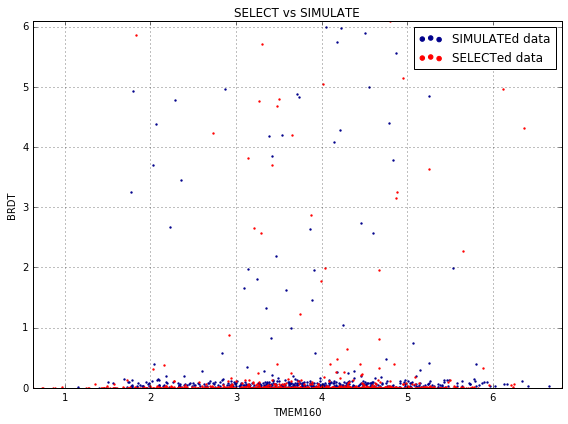

In [34]:
g1, g2 = np.random.choice(genes, 2, replace=False)
fig, ax = plot_simulated_data(g1, g2)

In [40]:
conditional_mi_str = '''
SIMULATE
    MUTUAL INFORMATION OF {g1} WITH {g2} GIVEN (part='{part}') USING 100 SAMPLES
        AS "mi"
FROM MODELS OF "data"
'''

In [41]:
print conditional_mi_str.format(g1='rseb', g2='fabi', part='True')


SIMULATE
    MUTUAL INFORMATION OF A1BG WITH A2ML1 USING 100 SAMPLES
        AS "mi"
FROM MODELS OF "data"



In [42]:
%bql {conditional_mi_str.format(g1='rseb', g2='fabi', part='True')}

,mi
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,-0.007631


In [43]:
pairwise = list(itertools.combinations(genes, 2))

In [41]:
def get_mi(g1, g2, condition):
    bql_query = conditional_mi_str.format(g1=g1, g2=g2, part=condition)
    # print bql_query
    df = %bql {bql_query}
    return df.mi.values

In [42]:
def linfoot_transform(mi):
    return np.sqrt(1 - np.exp(- 2 * mi))

In [43]:
total = len(pairwise)

In [44]:
def pair_to_name(c1, c2):
    return c1 + '--' + c2

In [45]:
def compute_dep_results(condition):
    results = {}
    print '==== Conditon: ' + condition + ' ===='
    for i, pair in enumerate(pairwise):
        c1 = pair[0]
        c2 = pair[1]
        main_key = pair_to_name(c1, c2).lower()
        results[main_key] = {}
        mi_vals = get_mi(c1, c2, condition)
        mi_vals[mi_vals < 0] = 0 # We're doing Monte Carlo approximations which can be < 0.
        results[main_key]['ri'] = linfoot_transform(mi_vals).tolist()
        if ((i+1) % 10) == 0:
            print 'Computed {} out of {} pairwise relationships'.format(i+1, len(pairwise))
    print ''
    return results

In [46]:
conditions = ['True', 'False']

In [48]:
results = {'mi':{}}
for condition in conditions:
    results['mi'][condition] = compute_dep_results(condition)
path = 'cmi-results/results-Bridge-demo-Arac-part.json'
print path
with open(path, 'w') as outfile:  
    outfile.write(simplejson.dumps(results, ignore_nan=True))

==== Conditon: True ====
Computed 10 out of 10 pairwise relationships

==== Conditon: False ====
Computed 10 out of 10 pairwise relationships

cmi-results/results-Bridge-demo-Arac-part.json
